In [ ]:
# Importando bibliotecas de trabajo

from urllib.request import urlretrieve
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Crea una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio.**

In [ ]:
urlEUROSTAT = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/ilc_pw01?precision=1&sex=T&indic_wb=JOBSAT&isced11=ED5-8&age=Y25-34"

**2. Crea un diccionario con el objeto JSON que se obtiene al realizar la petición a la API de la consulta del punto anterior. Imprime por pantalla el elemento "dimension" del diccionario creado.**

In [ ]:
result = json.load(urlopen(urlEUROSTAT))

print(result["dimension"])

{'unit': {'label': 'unit', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'isced11', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'indic_wb', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'age', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'geo', 'category': {'index': {'AL': 0, 'AT': 1, 'BE': 2, 'BG': 3, 'CH': 4, 'CY': 5, 'CZ': 6, 'DE': 7, 'DK': 8, 'EA': 9, 'EA18': 10, 'EA19': 11, 'EE': 12, 'EL': 13, 'ES': 14, 'EU': 15, 'EU27_2007': 16, 'EU27_2020': 17, 'EU28': 18, 'FI': 19, 'FR': 20, 'HR': 21, 'HU': 22, 'IE': 23, 'IS': 24, 'IT': 25, 'LT': 26, 'LU': 27, 'LV': 28, 'ME': 29, 'MK': 30, 'MT': 31, 'NL': 32, 'NO': 33, 'PL': 34, 'PT': 35, 'RO': 36, 'RS': 37, 'SE': 38, 'SI': 39, 'SK': 40, 'TR': 

**3. Descarga los datos de Satisfacción en Europa (código del dataset: ilc_pw01) en formato pandas a partir de la función get_data_df() de librería eurostat.**

In [ ]:
!pip install eurostat
import eurostat

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15147 sha256=a2d4f12d877adf2a6d863c548569943525152950125ee1c81acddbbfb9705f5b
  Stored in directory: /root/.cache/pip/wheels/58/88/2a/8d619cf38d7cf939e54b6ccdece05d31b64b3eb419c11d1ed3
Successfully built jsonpath-rw


In [ ]:
data = eurostat.get_data_df("ilc_pw01" , flags= False)
data.head(5)

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
0,RTG,ED0-2,ACCSAT,F,Y16-24,AT,NaN,8.6
1,RTG,ED0-2,ACCSAT,F,Y16-24,BE,NaN,7.8
2,RTG,ED0-2,ACCSAT,F,Y16-24,BG,NaN,5.3
3,RTG,ED0-2,ACCSAT,F,Y16-24,CH,NaN,NaN
4,RTG,ED0-2,ACCSAT,F,Y16-24,CY,NaN,8.2


**4. Filtra el conjunto de datos solicitados en el punto 1 directamente en este Data Frame y presenta las 6 primeras filas.**

In [ ]:
df = data.loc[(data["isced11"]== "ED5-8") & (data["indic_wb"] == "JOBSAT") & (data["sex"] == "T") & (data["age"] == "Y25-34")]
df.head(6)

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN
23646,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4


**5. Construye un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018.**

In [ ]:
# Creando nuevo dataframe quitando la columna 2013
df = df.iloc[:, 0:7]
df.head()

,unit,isced11,indic_wb,sex,age,geo\time,2018
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5


In [ ]:
# Renombrando columna de geo\time a country
df.rename(columns = {'geo\\time': 'country'}, inplace = True)

In [ ]:
# Excluyendo agrupaciones de países
df.drop(df.index[(df['country'] == 'EA18') | 
                 (df['country'] == 'EA19') |
                 (df['country'] == 'EU28') |
                 (df['country'] == 'EU27_2007') | 
                 (df['country'] == 'EU27_2020')], inplace = True)

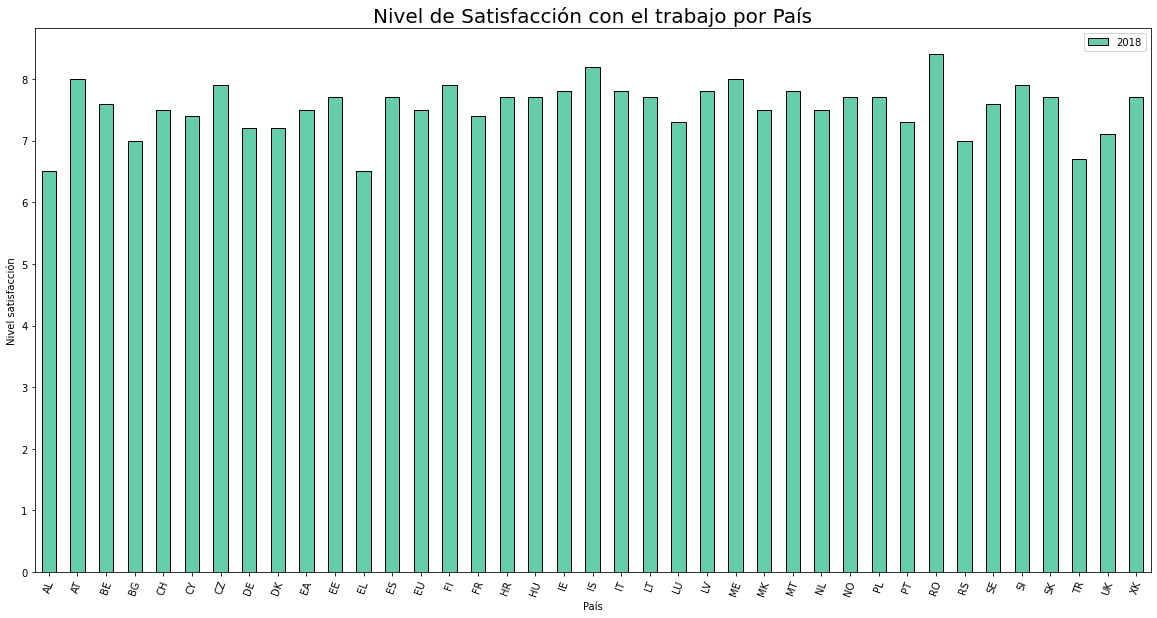

In [ ]:
# Creando gráfico de niveles de satisfacción por países
df.plot.bar(x='country', y= 2018, rot=70, width=0.5, color = 'mediumaquamarine', edgecolor='black', figsize=(20,10))
plt.title("Nivel de Satisfacción con el trabajo por País", fontsize = (20))

plt.xlabel('País')
plt.ylabel('Nivel satisfacción')
plt.show()

**6. ¿En qué país están más satisfechos con el trabajo en 2018? ¿En qué país están menos satisfechos?**

In [ ]:
df.sort_values(by=[2018])

,unit,isced11,indic_wb,sex,age,country,2018
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5
23654,RTG,ED5-8,JOBSAT,T,Y25-34,EL,6.5
23682,RTG,ED5-8,JOBSAT,T,Y25-34,TR,6.7
23678,RTG,ED5-8,JOBSAT,T,Y25-34,RS,7.0
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0
23683,RTG,ED5-8,JOBSAT,T,Y25-34,UK,7.1
23648,RTG,ED5-8,JOBSAT,T,Y25-34,DE,7.2
23649,RTG,ED5-8,JOBSAT,T,Y25-34,DK,7.2
23676,RTG,ED5-8,JOBSAT,T,Y25-34,PT,7.3
23668,RTG,ED5-8,JOBSAT,T,Y25-34,LU,7.3


En el país que están más satisfechos con el trabajo es en RO, o Rumanía, mientras que en los dos países que están menos satisfechos con el trabajo son en: AL y EL, o: Albania y Grecia.